### Zero-Shot Classification in NLP



**Zero-shot text classification is a task in natural language processing where a model is trained on a set of labeled examples but is then able to classify new examples from previously unseen classes.**

This is similar to the CLIP model in computer vision, but for NLP (text sentences).

![zsc](images/zsc.png)

#### About the Task

Zero Shot Classification is the task of predicting a class that wasn't seen by the model during training. This method, which leverages a pre-trained language model, can be thought of as an instance of transfer learning which generally refers to using a model trained for one task in a different application than what it was originally trained for. This is particularly useful for situations where the amount of labeled data is small.

In zero shot classification, we provide the model with a prompt and a sequence of text that describes what we want our model to do, in natural language. Zero-shot classification excludes any examples of the desired task being completed. This differs from single or few-shot classification, as these tasks include a single or a few examples of the selected task.

Zero, single and few-shot classification seem to be an emergent feature of large language models. This feature seems to come about around model sizes of +100M parameters. The effectiveness of a model at a zero, single or few-shot task seems to scale with model size, meaning that larger models (models with more trainable parameters or layers) generally do better at this task.

### Inference with pipeline



In [1]:
from transformers import pipeline

pipe = pipeline("zero-shot-classification")

No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.


#### Example 1: Customer Service

In [2]:
import pandas as pd

data = [{
    "text" : "I have a problem with my iphone that needs to be resolved asap!",
    "customer" : "AAAA"
},
{
    "text" : "I have a problem with my Mac that is catching fire right now!",
    "customer" : "AA"
}]

df = pd.DataFrame(data)

df

,text,customer
0,I have a problem with my iphone that needs to ...,AAAA
1,I have a problem with my Mac that is catching ...,AA


In [4]:
pipe(df.text.tolist(),
    candidate_labels=["urgent", "not urgent", "phone", "tablet", "computer", "Mac"],
    multi_class=False
)

The `multi_class` argument has been deprecated and renamed to `multi_label`. `multi_class` will be removed in a future version of Transformers.
/Users/victorgallego/miniforge3/lib/python3.9/site-packages/torch/utils/data/dataloader.py:643: UserWarning: Length of IterableDataset <transformers.pipelines.pt_utils.PipelineChunkIterator object at 0x110ac7790> was reported to be 2 (when accessing len(dataloader)), but 3 samples have been fetched. 
  warnings.warn(warn_msg)
/Users/victorgallego/miniforge3/lib/python3.9/site-packages/torch/utils/data/dataloader.py:643: UserWarning: Length of IterableDataset <transformers.pipelines.pt_utils.PipelineChunkIterator object at 0x110ac7790> was reported to be 2 (when accessing len(dataloader)), but 4 samples have been fetched. 
  warnings.warn(warn_msg)
/Users/victorgallego/miniforge3/lib/python3.9/site-packages/torch/utils/data/dataloader.py:643: UserWarning: Length of IterableDataset <transformers.pipelines.pt_utils.PipelineChunkIterator object at 

[{'sequence': 'I have a problem with my iphone that needs to be resolved asap!',
  'labels': ['urgent', 'phone', 'computer', 'not urgent', 'tablet', 'Mac'],
  'scores': [0.522032618522644,
   0.4575027823448181,
   0.014244725927710533,
   0.002681280020624399,
   0.0021490638609975576,
   0.0013895597076043487]},
 {'sequence': 'I have a problem with my Mac that is catching fire right now!',
  'labels': ['computer', 'Mac', 'urgent', 'not urgent', 'phone', 'tablet'],
  'scores': [0.45493218302726746,
   0.3786928951740265,
   0.1611764281988144,
   0.0029544392600655556,
   0.0011420187074691057,
   0.0011020548408851027]}]

In [19]:
pipe("I have a problem with my iphone that needs to be resolved asap!",
    candidate_labels=["urgent", "not urgent", "phone", "tablet", "computer"],
)

The `multi_class` argument has been deprecated and renamed to `multi_label`. `multi_class` will be removed in a future version of Transformers.


{'sequence': 'I have a problem with my iphone that needs to be resolved asap!',
 'labels': ['urgent', 'phone', 'computer', 'not urgent', 'tablet'],
 'scores': [0.9987171292304993,
  0.9945850372314453,
  0.18988825380802155,
  0.0007674169610254467,
  0.0003826009633485228]}

Notice all the probabilities (scores) add up to 1.0. This is because the model is trained to output a probability distribution over the classes. The class with the highest probability is "urgent".

#### Example 2: Activity classification

In [5]:
sequence_to_classify = "one day I will see the world"
candidate_labels = ['travel', 'cooking', 'dancing']
pipe(sequence_to_classify, candidate_labels)

{'sequence': 'one day I will see the world',
 'labels': ['travel', 'dancing', 'cooking'],
 'scores': [0.9938651919364929, 0.0032738191075623035, 0.0028610145673155785]}

### Multi-Label Classification

If more than one candidate label can be correct, pass `multi_label=True` to calculate each class independently:

In [6]:
candidate_labels = ['travel', 'cooking', 'dancing', 'exploration']
pipe(sequence_to_classify, candidate_labels, multi_label=True)

{'sequence': 'one day I will see the world',
 'labels': ['travel', 'exploration', 'dancing', 'cooking'],
 'scores': [0.994511067867279,
  0.9383878111839294,
  0.005706228781491518,
  0.0018192909192293882]}

Notice now the probabilities are independent of each other, and the model is able to predict multiple classes at the same time (i.e., they do not add up to 1.0).

In [5]:
pipe("I have a problem with my iphone that needs to be resolved asap!",
    candidate_labels=["urgent", "not urgent", "phone", "tablet", "computer"],
    multi_class=True
)

The `multi_class` argument has been deprecated and renamed to `multi_label`. `multi_class` will be removed in a future version of Transformers.


{'sequence': 'I have a problem with my iphone that needs to be resolved asap!',
 'labels': ['urgent', 'phone', 'computer', 'not urgent', 'tablet'],
 'scores': [0.9987171292304993,
  0.9945850372314453,
  0.18988825380802155,
  0.0007674169610254467,
  0.0003826009633485228]}

### Available zero-shot classification models

All the models can be checked at https://huggingface.co/models?pipeline_tag=zero-shot-classification&sort=downloads

The main differences:

* Size (in number of parameters): bigger models tend to be more accurate, but also slower and more resource-intensive (remember the trade-off from computer vision models, it happens the same in NLP).
* Languages: most models are trained only in English, but some other are specialized in other languages, or are even multilingual.

### Multi-lingual Zero-Shot Classification 🌍

If a model has the "XLM" as part of its name, it means it is a multi-lingual model. This means it can understand text in multiple languages. This is particularly useful for companies that operate in multiple countries and need to understand and generate text in multiple languages.

(Apart from "XLM", there are many more models that are multilingual, the previous is just an example of a popular family of multilingual models).

In [8]:
pipe = pipeline('zero-shot-classification', model="vicgalle/xlm-roberta-large-xnli-anli")

In [9]:
sequence_to_classify = "Algún día iré a ver el mundo"
candidate_labels = ['viaje', 'cocina', 'danza']

pipe(sequence_to_classify, candidate_labels)

{'sequence': 'Algún día iré a ver el mundo',
 'labels': ['viaje', 'danza', 'cocina'],
 'scores': [0.9991760849952698, 0.0004178229719400406, 0.00040599776548333466]}

In [10]:
# Function to plot results
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("whitegrid")
sns.set_context("notebook")
def plot_output(output):
    scores = output["scores"]
    colors = list(map(lambda color: sns.palettes.light_palette(color)[2],["red" if score > .5 else "blue" for score in scores]))
    plt.figure(dpi=100)
    plt.bar(output["labels"], scores, color = colors )
    plt.xlabel("Labels")
    plt.ylabel("Probability")
    plt.title(output["sequence"])
    n = list(range(len(scores)))
    for i in n:
        plt.annotate(f"{100*scores[i]:.1f}%", xy=(n[i],scores[i]*.8), ha='center', va='bottom')

    plt.show()

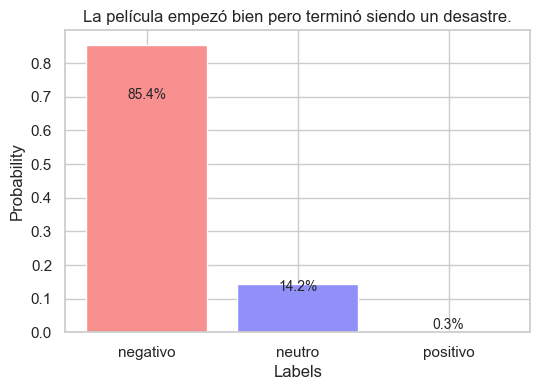

In [11]:
sequence_to_classify = "La película empezó bien pero terminó siendo un desastre."
candidate_labels = "positivo negativo neutro".split()
output = pipe (sequence_to_classify, candidate_labels)

plot_output(output)

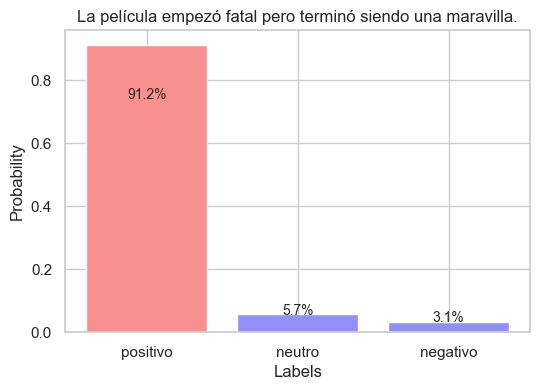

In [12]:
sequence_to_classify = "La película empezó fatal pero terminó siendo una maravilla."
candidate_labels = "positivo negativo neutro".split()
output = pipe(sequence_to_classify, candidate_labels)
plot_output(output)

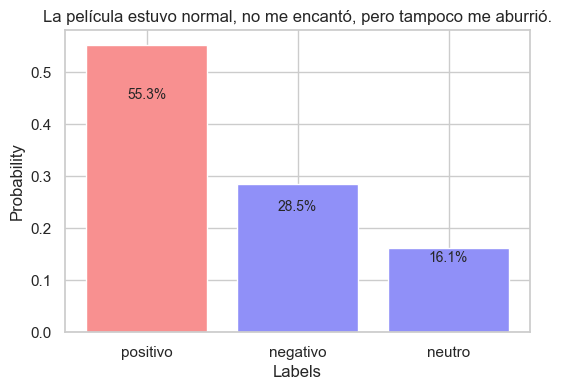

In [13]:
sequence_to_classify = "La película estuvo normal, no me encantó, pero tampoco me aburrió."
candidate_labels = "positivo negativo neutro".split()
output = pipe(sequence_to_classify, candidate_labels)

plot_output(output)

Notice we can even write the class labels in another language. Probabilities shall no change significantly.

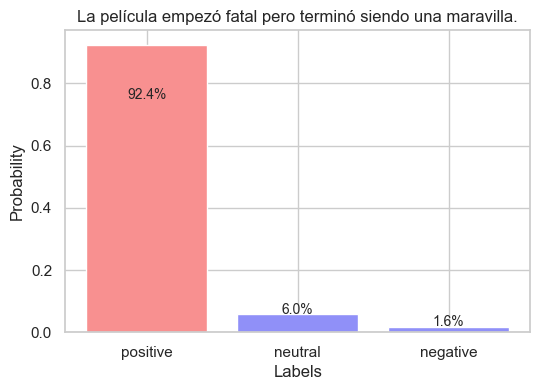

In [14]:
sequence_to_classify = "La película empezó fatal pero terminó siendo una maravilla."
candidate_labels = "positive negative neutral".split()
output = pipe(sequence_to_classify, candidate_labels)
plot_output(output)

#### Topic classification

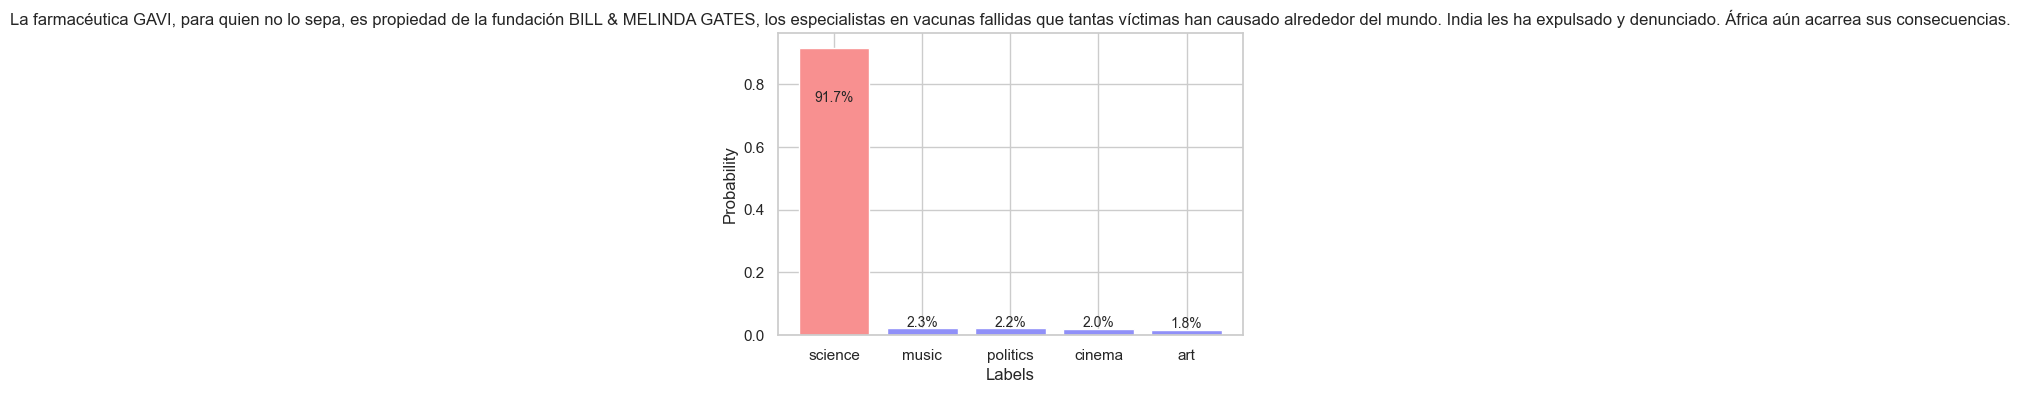

In [15]:
sequence_to_classify = "La farmacéutica GAVI, para quien no lo sepa, es propiedad de la fundación BILL & MELINDA GATES, los especialistas en vacunas fallidas que tantas víctimas han causado alrededor del mundo. India les ha expulsado y denunciado. África aún acarrea sus consecuencias."

candidate_labels = "music cinema politics science art".split()
output = pipe(sequence_to_classify, candidate_labels)
plot_output(output)

In [ ]:
sequence_to_classify = "La farmacéutica GAVI, para quien no lo sepa, es propiedad de la fundación BILL & MELINDA GATES, los especialistas en vacunas fallidas que tantas víctimas han causado alrededor del mundo. India les ha expulsado y denunciado. África aún acarrea sus consecuencias."

candidate_labels = "music cinema politics science art".split()
output = pipe(sequence_to_classify, candidate_labels)
plot_output(output)

### How to check the number of parameters of a transformers model?

In its page of the Model Hub, notice the parameter count to the right:


![params](images/model_hub.png)

### Exercise: Brainstorm an NLP application in which you could use zero-shot classification

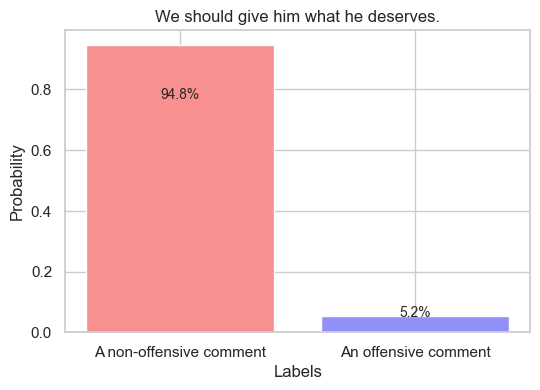

In [24]:
# Detecting threats

sequence_to_classify = "We should give him what he deserves."

candidate_labels = ["An offensive comment", "A non-offensive comment"]
output = pipe(sequence_to_classify, candidate_labels)
plot_output(output)

### Extra: how does zero-shot classification work under the hood?

**The NLP models to do zero-shot classification are pretrained on a generic task that is called "Natural Language Inference".**

In this task, we consider two sentences as input:
* A premise.
* An hypothesis.

The task is to classify whether the hypothesis is TRUE (entailment), FALSE (contradiction), or NEUTRAL, given the premise. That is, is a 3-label classification problem. See the table for a few examples:

![examples](https://joeddav.github.io/blog/images/zsl/nli-examples.png)

Inside the model, we feed as inputs both the premise and the hypothesis, and then the final NN layer just classifies into contradiction, entailment, or neutral.

##### How to turn this problem into zero-shot classification?

Just take the sentence we want to classify as the premise, and use one different hypothesis for each label we want to classify. Then, the model will output the probabilities of each label being true, given the sentence.

For example:

* Premise: "I hate this movie, it is so boring."

Let's say we want to zero-shot classify into positive or negative sentiment. We can use the following hypotheses:

* Hypothesis 1: "This is positive."
* Hypothesis 2: "This is negative."

Then, the model will output the probabilities of each hypothesis being true (entailment), given the sentence. This is how zero-shot classification works under the hood.